## 利用torch.nn实现前馈神经网络解决上述多分类任务
### 分析实验结果并绘制训练集和测试集的loss曲线

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [10]:
# 定义数据增强和标准化的预处理操作
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载数据集
train_dataset = datasets.MNIST(root=r'E:\STUDYCONTENT\Pycharm\DeepLearningExp', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root=r'E:\STUDYCONTENT\Pycharm\DeepLearningExp', train=False, transform=transforms.ToTensor())

# 定义训练数据加载器和测试数据加载器
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [11]:
class Net(nn.Module):
    def __init__(self, activation='relu'):
        super(Net, self).__init__()
        self.activation = activation
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    # 使用3种不同的激活函数
    def forward(self, x):
        x = x.view(-1, 784)
        # x = F.relu(self.fc1(x))
        if self.activation == 'tanh':
            x = F.tanh(self.fc1(x))
        elif self.activation == 'sigmoid':
            x = F.sigmoid(self.fc1(x))
        else:
            x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [12]:
# 实例化模型和损失函数
model1 = Net(activation='relu')
model2 = Net(activation='tanh')
model3 = Net(activation='sigmoid')
criterion = nn.CrossEntropyLoss()
# 实例化优化器
optimizer1 = optim.Adam(model1.parameters(), lr=0.01)
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)
optimizer3 = optim.Adam(model3.parameters(), lr=0.01)

In [13]:
# 模型loss画图
def plot_loss(train_loss, val_loss):
    epochs = len(train_loss)
    x = range(epochs)
    plt.plot(x, train_loss, label='Train')
    plt.plot(x, val_loss, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Epoch [1/10], Step [100/938], Loss: 0.4307
Epoch [1/10], Step [200/938], Loss: 0.4160
Epoch [1/10], Step [300/938], Loss: 0.3073
Epoch [1/10], Step [400/938], Loss: 0.2249
Epoch [1/10], Step [500/938], Loss: 0.3517
Epoch [1/10], Step [600/938], Loss: 0.5939
Epoch [1/10], Step [700/938], Loss: 0.2442
Epoch [1/10], Step [800/938], Loss: 0.2387
Epoch [1/10], Step [900/938], Loss: 0.4943
Test Accuracy: 0.9401
Epoch [2/10], Step [100/938], Loss: 0.1526
Epoch [2/10], Step [200/938], Loss: 0.1524
Epoch [2/10], Step [300/938], Loss: 0.0576
Epoch [2/10], Step [400/938], Loss: 0.1038
Epoch [2/10], Step [500/938], Loss: 0.0833
Epoch [2/10], Step [600/938], Loss: 0.1260
Epoch [2/10], Step [700/938], Loss: 0.0931
Epoch [2/10], Step [800/938], Loss: 0.1289
Epoch [2/10], Step [900/938], Loss: 0.0935
Test Accuracy: 0.9486
Epoch [3/10], Step [100/938], Loss: 0.2491
Epoch [3/10], Step [200/938], Loss: 0.0971
Epoch [3/10], Step [300/938], Loss: 0.1385
Epoch [3/10], Step [400/938], Loss: 0.1091
Epoch [3/1

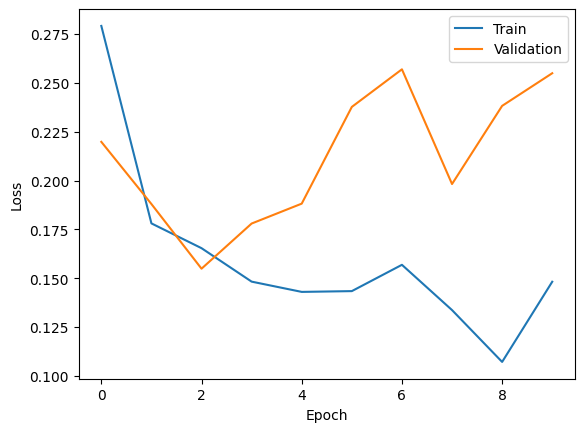

In [14]:
# 记录训练集和测试集的loss
train_losses = []
test_losses = []

# 训练模型
num_epochs = 10
device = 'cpu'

# 训练模型
for epoch in range(num_epochs):
    # 训练模式
    model1.train()
    total_loss= 0

    for batch_idx, (data, target) in enumerate(train_loader):
        # 将输入和标签转为tensor
        data = data.to(device)
        target = target.to(device)

        # 前向传播
        output = model1(data)

        # 计算损失
        loss = criterion(output, target)

        # 反向传播和优化
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()

        # 记录训练集的loss
        total_loss += loss

        # 打印训练状态
        if (batch_idx+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, batch_idx+1, len(train_loader), loss.item()))

    train_losses.append(float(total_loss/len(train_loader)))

    # 测试模式
    model1.eval()

    with torch.no_grad():
        test_loss = 0
        correct = 0
        test_total = 0.0
        for data, target in test_loader:
            # 将输入和标签转为tensor
            data = data.to(device)
            target = target.to(device)

            # 前向传播
            output = model1(data)

            # 计算损失
            test_loss += criterion(output, target).item()

            # 统计准确率
            _, predicted = torch.max(output.data, 1)
            test_total += target.size(0)
            correct += (predicted == target).sum().item()

        # 计算平均测试集loss并记录
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        # 打印测试集准确率
        print('Test Accuracy: {:.4f}'.format(correct/test_total))


#绘制图片
plot_loss(train_losses, test_losses)

E:\SOFTWARE\Python39\lib\site-packages\torch\nn\functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch [1/10], Step [100/938], Loss: 0.2254
Epoch [1/10], Step [200/938], Loss: 0.2839
Epoch [1/10], Step [300/938], Loss: 0.3200
Epoch [1/10], Step [400/938], Loss: 0.2688
Epoch [1/10], Step [500/938], Loss: 0.3612
Epoch [1/10], Step [600/938], Loss: 0.2338
Epoch [1/10], Step [700/938], Loss: 0.2798
Epoch [1/10], Step [800/938], Loss: 0.4970
Epoch [1/10], Step [900/938], Loss: 0.2543
Test Accuracy: 0.8948
Epoch [2/10], Step [100/938], Loss: 0.4553
Epoch [2/10], Step [200/938], Loss: 0.3431
Epoch [2/10], Step [300/938], Loss: 0.3788
Epoch [2/10], Step [400/938], Loss: 0.1235
Epoch [2/10], Step [500/938], Loss: 0.2709
Epoch [2/10], Step [600/938], Loss: 0.4607
Epoch [2/10], Step [700/938], Loss: 0.2964
Epoch [2/10], Step [800/938], Loss: 0.2621
Epoch [2/10], Step [900/938], Loss: 0.1898
Test Accuracy: 0.9504
Epoch [3/10], Step [100/938], Loss: 0.3562
Epoch [3/10], Step [200/938], Loss: 0.2552
Epoch [3/10], Step [300/938], Loss: 0.0660
Epoch [3/10], Step [400/938], Loss: 0.2538
Epoch [3/1

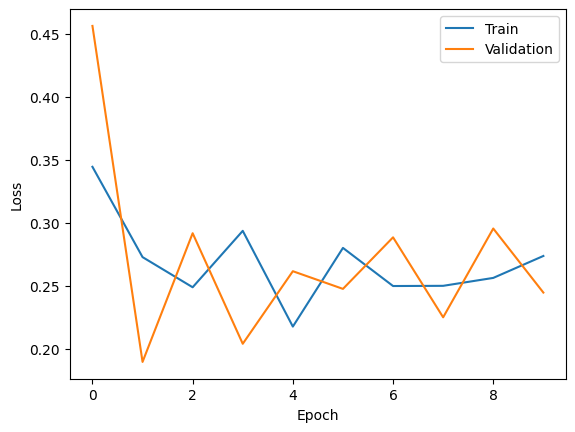

In [15]:
# 记录训练集和测试集的loss
train_losses = []
test_losses = []

# 训练模型
num_epochs = 10
device = 'cpu'

# 训练模型
for epoch in range(num_epochs):
    # 训练模式
    model2.train()
    total_loss = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        # 将输入和标签转为tensor
        data = data.to(device)
        target = target.to(device)

        # 前向传播
        output = model2(data)

        # 计算损失
        loss = criterion(output, target)

        # 反向传播和优化
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

        # 记录训练集的loss
        total_loss += loss

        # 打印训练状态
        if (batch_idx+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, batch_idx+1, len(train_loader), loss.item()))

    train_losses.append(float(total_loss/len(train_loader)))

    # 测试模式
    model2.eval()

    with torch.no_grad():
        test_loss = 0
        correct = 0
        test_total = 0.0
        for data, target in test_loader:
            # 将输入和标签转为tensor
            data = data.to(device)
            target = target.to(device)

            # 前向传播
            output = model2(data)

            # 计算损失
            test_loss += criterion(output, target).item()

            # 统计准确率
            _, predicted = torch.max(output.data, 1)
            test_total += target.size(0)
            correct += (predicted == target).sum().item()

        # 计算平均测试集loss并记录
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        # 打印测试集准确率
        print('Test Accuracy: {:.4f}'.format(correct/test_total))


#绘制图片
plot_loss(train_losses, test_losses)

E:\SOFTWARE\Python39\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [1/10], Step [100/938], Loss: 0.2795
Epoch [1/10], Step [200/938], Loss: 0.3971
Epoch [1/10], Step [300/938], Loss: 0.1593
Epoch [1/10], Step [400/938], Loss: 0.2652
Epoch [1/10], Step [500/938], Loss: 0.2239
Epoch [1/10], Step [600/938], Loss: 0.1696
Epoch [1/10], Step [700/938], Loss: 0.0269
Epoch [1/10], Step [800/938], Loss: 0.1259
Epoch [1/10], Step [900/938], Loss: 0.2546
Test Accuracy: 0.9556
Epoch [2/10], Step [100/938], Loss: 0.1891
Epoch [2/10], Step [200/938], Loss: 0.0557
Epoch [2/10], Step [300/938], Loss: 0.1083
Epoch [2/10], Step [400/938], Loss: 0.1014
Epoch [2/10], Step [500/938], Loss: 0.2222
Epoch [2/10], Step [600/938], Loss: 0.1664
Epoch [2/10], Step [700/938], Loss: 0.0242
Epoch [2/10], Step [800/938], Loss: 0.1158
Epoch [2/10], Step [900/938], Loss: 0.1249
Test Accuracy: 0.9630
Epoch [3/10], Step [100/938], Loss: 0.1696
Epoch [3/10], Step [200/938], Loss: 0.2368
Epoch [3/10], Step [300/938], Loss: 0.0876
Epoch [3/10], Step [400/938], Loss: 0.1427
Epoch [3/1

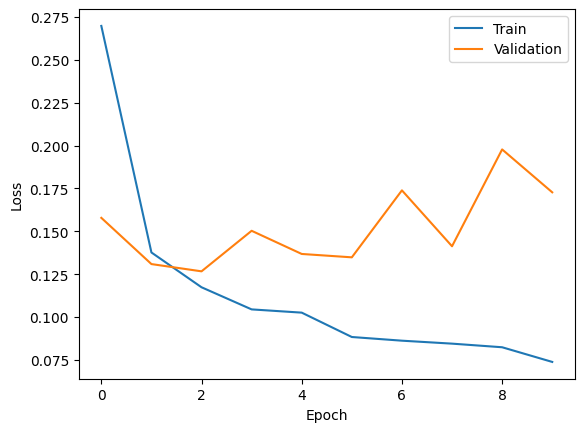

In [16]:
# 记录训练集和测试集的loss
train_losses = []
test_losses = []

# 训练模型
num_epochs = 10
device = 'cpu'

# 训练模型
for epoch in range(num_epochs):
    # 训练模式
    model3.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        # 将输入和标签转为tensor
        data = data.to(device)
        target = target.to(device)

        # 前向传播
        output = model3(data)

        # 计算损失
        loss = criterion(output, target)

        # 反向传播和优化
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()

        # 记录训练集的loss
        total_loss += loss

        # 打印训练状态
        if (batch_idx+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, batch_idx+1, len(train_loader), loss.item()))

    train_losses.append(float(total_loss/len(train_loader)))

    # 测试模式
    model3.eval()

    with torch.no_grad():
        test_loss = 0
        correct = 0
        test_total = 0.0
        for data, target in test_loader:
            # 将输入和标签转为tensor
            data = data.to(device)
            target = target.to(device)

            # 前向传播
            output = model3(data)

            # 计算损失
            test_loss += criterion(output, target).item()

            # 统计准确率
            _, predicted = torch.max(output.data, 1)
            test_total += target.size(0)
            correct += (predicted == target).sum().item()

        # 计算平均测试集loss并记录
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        # 打印测试集准确率
        print('Test Accuracy: {:.4f}'.format(correct/test_total))


#绘制图片
plot_loss(train_losses, test_losses)

对于实验结果的分析，可以通过比较不同激活函数下的模型在训练集和测试集上的表现来评估其性能。

首先，可以从训练集和测试集的loss曲线来观察模型的表现。如果训练集的loss下降很快，但测试集的loss下降缓慢或者停滞不前，那么就有可能出现过拟合的情况。如果训练集和测试集的loss都下降得很快，而且测试集的loss能够达到比较低的水平，那么就可以认为模型表现比较好。

其次，可以观察不同激活函数下的模型在测试集上的表现，比较它们的准确率和混淆矩阵等指标，从而进一步评估模型的性能。

#### 激活函数在神经网络中扮演着非常重要的角色，它们将输入转换为输出并赋予神经网络非线性特性。不同的激活函数在这个转换过程中具有不同的特性，可以影响神经网络的学习能力、收敛速度和准确性。

常见的激活函数包括：

(1) Sigmoid函数：将输入值压缩到0和1之间，因此可以用于二分类问题。缺点是在输入值较大或较小时，梯度会变得非常小，这会导致梯度消失问题。

(2) Tanh函数：与Sigmoid函数类似，但将输入值压缩到-1和1之间。可以用于二分类问题，也可以用于多分类问题。与Sigmoid函数相比，它的输出范围更广，具有更强的非线性特性。但是，与Sigmoid函数一样，它也容易出现梯度消失问题。

(3) ReLU函数：修正线性单元是当前最常用的激活函数之一，它在输入为正时输出输入值，否则输出0。它可以避免梯度消失问题，加快训练速度。缺点是在输入为负时，梯度为0，可能会导致神经元“死亡”。

(4) Leaky ReLU函数：与ReLU函数类似，但在输入为负时，不是输出0，而是输出一个小的斜率。这样可以避免神经元“死亡”的问题，但可能会导致梯度爆炸问题。

(5) Softmax函数：将输出转换为概率分布，常用于多分类问题。

选择哪种激活函数取决于具体的问题和网络架构，需要根据实验结果进行选择。